In [ ]:
# Initialize Otter
import otter
grader = otter.Notebook("hwk2-task3-aqi.ipynb")

# Task 3: Visualizing AQI during the 2017 Thomas Fire in Santa Barbara County

This task covers topics on the lesson on [time series](https://meds-eds-220.github.io/MEDS-eds-220-course/book/chapters/lesson-7-time-series.html). 

## Instructions 

- First, update the following cell to have a link to *your* Homework 2 GitHub repository:

**UPDATE THIS LINK**
https://github.com/MEDS-eds-220/eds220-hwk2


- Review the [complete rubric for this task](https://docs.google.com/document/d/131OnUDOLpOl94SlaMU9nGqT998ABrjFS/edit?usp=sharing&ouid=111507336322611936333&rtpof=true&sd=true) before starting.

- **Make at least 5 commits. Generally, commit every time you finish a major step.** We'll check your repository and view the commit history.

- **Add comments for all your code.** Err on the side of commenting too much for now. Comments should follow best practices.

- **Do not update the top cell with the `otter` import**, this is used internally for grading.


## About the data

In this task you will use [Air Quality Index (AQI)](https://www.airnow.gov/aqi/aqi-basics/) data from the [US Environmental Protection Agency](https://www.epa.gov) to visualize the impact on the AQI of the 2017 [Thomas Fire](https://en.wikipedia.org/wiki/Thomas_Fire) in Santa Barbara County. 

## FINAL CODE

You will use the next code cell to complete the last exercise in the task. Leave it blank for now. 

<Axes: title={'center': 'AQI of SB County in 2017 and 2018'}, xlabel='Date', ylabel='Air Quality Index (AQI)'>

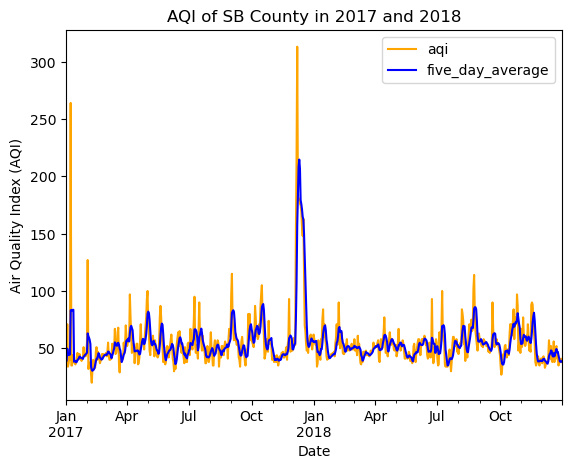

In [1]:
# 2. Import pandas
import pandas as pd

# Read in data
aqi_17 = pd.read_csv('https://aqs.epa.gov/aqsweb/airdata/daily_aqi_by_county_2017.zip', compression = 'zip')
aqi_18 = pd.read_csv('https://aqs.epa.gov/aqsweb/airdata/daily_aqi_by_county_2018.zip', compression = 'zip')

# 4. Concatenate data frames from 2017 and 2018 for further exploration
aqi = pd.concat([aqi_17, aqi_18])

# 5. Simplify column names
aqi.columns = (aqi.columns
                  .str.lower()
                  .str.replace(' ','_'))

# 6. Select rows where county name is santa barbara to find just SB data
aqi_sb = aqi[aqi['county_name'] == "Santa Barbara"]

# Drop uneeded columns for cleanliness
aqi_sb = aqi_sb.drop(columns = ['state_name', 'county_name', 'state_code', 'county_code'])

# 7. Select date column and change it to a pandas date time for indexing
aqi_sb.date = pd.to_datetime(aqi_sb['date'])

# Set index as our datetime 
aqi_sb = aqi_sb.set_index('date')

# 8. Calculate AQI rolling average over 5 days
rolling_average = aqi_sb['aqi'].rolling('5D').mean()

# 9. Define new column and set it to our rolling average series 
aqi_sb['five_day_average'] = rolling_average

# 10. Drop uneeded column and Plot
aqi_sb.drop(columns = 'number_of_sites_reporting').plot.line(title = "AQI of SB County in 2017 and 2018",
                                                            xlabel = "Date",
                                                            ylabel = "Air Quality Index (AQI)",
                                                            color = ['orange', 'blue'],
                                                            )

## 1

a. Read the [Air Quality Index (AQI) Basics](https://www.airnow.gov/aqi/aqi-basics/) from the AirNow.gov portal.

b. Go to [EPA's website on Air Quality Data Collected at Outdoor Monitors Across the US](https://www.epa.gov/outdoor-air-quality-data). 

c. Under "Donwload Data", click on "Pre-generated Data Files".

d. Read the "About the data" section.

## 2
a. Back in the "Pre-generated Data Files" site, click on "Tables of Daily AQI".

b. Copy the URL to the 2017 Daily AQI **by County** ZIP file `daily_aqi_by_county_2017.zip`

Notice we'll be reding the data directly from its ZIP file link. This ZIP file contains a single CSV that has been compressed to save space. 

<!-- BEGIN QUESTION -->

c. In the next code cell read in the data from the URL using the [`pd.read_csv`](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) function with the `compression='zip'` parameter added and store it as `aqi_17`. 

d. In the same cell, read in the data for the 2018 Daily AQI by County ZIP file and store it as `aqi_18`.

In [ ]:
# Import pandas
import pandas as pd
# Read in data
aqi_17 = pd.read_csv('https://aqs.epa.gov/aqsweb/airdata/daily_aqi_by_county_2017.zip', compression = 'zip')
aqi_18 = pd.read_csv('https://aqs.epa.gov/aqsweb/airdata/daily_aqi_by_county_2018.zip', compression = 'zip')

<!-- END QUESTION -->

## 3
a. and b. Use the next two code cells to look at the head of both data frames. Store your results in `aqi_17_head` and `aqi_18_head`. 

In [ ]:
# a.
# Check head
aqi_17_head = aqi_17.head()

In [ ]:
# b.
# Check head
aqi_18_head = aqi_18.head()

In [ ]:
grader.check("q3_a")

<!-- BEGIN QUESTION -->

c. Use this code cell to make some other preliminary data exploration of your choosing.

In [ ]:
aqi_17_head
print(aqi_18_head)
print(aqi_17['Defining Parameter'].unique())
print(aqi_17['State Code'].nunique())
print(aqi_17['AQI'].mean())
print(aqi_17['AQI'].mean())

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

d. Use this markdown cell to explain why you decided to do the exploration in c. and what information you obtained from doing it.

I was interested in what Defining parameters they use so I found those and check to see if there was a difference between average AQI in 2017 and 2018 (there wasnt much of one). I also made sure the data included all 54 states (which it does).

<!-- END QUESTION -->

## 4
We currently have two separate data frames. For this exercise we will need to "glue" them one on top of the other. The `pandas` function `pd.concat()` can achieve this. 

Pass `[aqi_17, aqi_18]` as the input of `pd.concat()` and store the output as  `aqi`.  
In the next line run `aqi`.

NOTE: When we concatenate data frames like this, without any extra parameters for `pd.concat()` the indices for the two dataframes are just "glued together", the index of the resulting dataframe is not updated to start from 0. Notice the mismatch between the index of `aqi` and the number of rows i the complete data frame.


In [ ]:
# concatenate data frames from 2017 and 2018 for further exploration
aqi = pd.concat([aqi_17, aqi_18])
aqi

In [ ]:
grader.check("q4")

<!-- BEGIN QUESTION -->

## 5

Run the following code cell and use the next markdown cell to give a line by line explanation of the code below the comment "#Simplify column names". You might need to look up the `pandas` documentation.

In [ ]:
# Initial column names: notice caps and spaces (difficult to work with!)
print(aqi.columns, '\n')

# Simplify column names
aqi.columns = (aqi.columns
                  .str.lower()
                  .str.replace(' ','_')
                )
print(aqi.columns, '\n')

First we specify that we are saving our changes in the aqi columns. The changes are on the columns so we first select the columns in aqi once more, the we use .str to turn the columns into a string so that we can make them all lowercase with .lower(). Then we make them a string again and replace spaces with underscores using .replace. Then we print the column names adding \n to make a neat space in our output.

<!-- END QUESTION -->

## 6
In the next code cell:

a. Select only data from `Santa Barbara` county and store it in a new variable `aqi_sb`.

b. Remove the `state_name`, `county_name`, `state_code` and `county_code` columns from `aqi_sb`.

Your dataframe should have the following columns in this order: `date`, `aqi`, `category`, `defining_parameter`, `defining_stie`, `number_of_sites_reporting`. 

In [ ]:
# Select rows where county name is santa barbara to find just SB data
aqi_sb = aqi[aqi['county_name'] == "Santa Barbara"]
# Drop uneeded columns for cleanliness
aqi_sb = aqi_sb.drop(columns = ['state_name', 'county_name', 'state_code', 'county_code'])
aqi_sb

In [ ]:
grader.check("q6a")

 
c. What is the data type of the `date` column? Write your answer in the markdown cell below. 

The data type of the date column is an Object.

*Your answer here.*

In [ ]:
# Check data types to find date type
aqi_sb.dtypes

<!-- BEGIN QUESTION -->

## 7
In the following cell:
1. Update the date column of `aqi_sb` to be a `pandas.datetime` object.
2. Update the index of `aqi_sb` to be the `date` column.

In [ ]:
# Select date column and change it to a pandas date time for indexing
aqi_sb.date = pd.to_datetime(aqi_sb['date'])
# Set index as our datetime 
aqi_sb = aqi_sb.set_index('date')
aqi_sb

<!-- END QUESTION -->

## 8
In the next cell we will calculate an average over a [rolling window](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.rolling.html) using the `rolling()`method for `pandas.Series`:

- `rolling()` is a lazy method, so we need to specify what we want to calculate over each window before it does something. 
- in this example we use the aggregator function `mean()` to calculate the average over each window
- the parameter '5D' indicates we want the window for our rolling average to be 5 days. 
- we get a `pandas.Series` as ouput

Store your answer in the `rolling_average` variable. You should have two columns in your series, `date` and the averages. 

In [ ]:
# Calculate AQI rolling average over 5 days
rolling_average = aqi_sb['aqi'].rolling('5D').mean()
rolling_average

In [ ]:
grader.check("q8")

## 9 

Without creating any new variables, add the mean of the AQI over a 5-day rolling window as a new column named `five_day_average` to the `aqi_sb` dataframe. 

In [ ]:
# Define new column and set it to our rolling average series 
aqi_sb['five_day_average'] = rolling_average

In [ ]:
grader.check("q9")

<!-- BEGIN QUESTION -->

## 10
Make a line plot showing both the daily AQI and the 5-day average (5-day average on top of the AQI). Make necessary updates for the plot to be accurate, informative, and polished, even if simple. You're welcome to use plotting methods and packages beyond what we have covered in class! 

Can you see the AQI going up during the Thomas Fire in December 2017?

In [ ]:
# Drop unneeded column and plot!
aqi_sb.drop(columns = 'number_of_sites_reporting').plot.line(title = "AQI of SB County in 2017 and 2018",
                                                            xlabel = "Date",
                                                            ylabel = "Air Quality Index (AQI)",
                                                            color = ['orange', 'blue'],
                                                            )

---

To double-check your work, the cell below will rerun all of the autograder tests.

In [ ]:
grader.check_all()

<!-- END QUESTION -->

## 11


Collect all the relevant code into the first blank cell of the notebook titled "COMPLETE WORKFLOW". This single cell will have the end-to-end workflow: from importing libraries and loading the data, to producing the graph. The *only* ouput of this cell should be the graph you produced in the previous exercise. Further guidance on what to include in this final workflow is in the [assignment rubric](https://docs.google.com/document/d/1x0BoU6IH4cnOR1-n7i9CYQ9wUC37yDpYlQ4j6rCfcsU/edit?tab=t.0).